# **Neural Network using NumPy**

**(A Perceptron)**

### Architecture

- "Fully connected" network
- 1 X1 input layer
- 1 hidden layer (actually 2 layers: X2 and Y1)
- 1 Y2 output layer

### Purpose of Weights and Biases

**Weights**: adjust the connection strengths between neurons.
**Biases**: adjust the **neurons** themselves, **increasing** or **decreasing** their **outputs**.

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

<hr style="border:2px solid gray"></hr>

## Gradient Descent/Optimization

**Partial derivative** with respect to the **X variable**:
\begin{equation}
    \nabla_x = \frac{\partial}{\partial x}
\end{equation}

The gradient descent equation is then defined as:

\begin{equation}
    x_{n+1} = x_n - \alpha \nabla_x{y(x)}
\end{equation}

where <font color='dodgerblue'>$x_n$</font> is **current x value** (e.g., initial) and <font color='dodgerblue'>$\alpha$</font> is the **step size** (i.e., **learning rate**), and <font color='dodgerblue'>$x_{n+1}$</font> is the **new x value**.

**Example**: Gradient descent for a simple one-dimensional function

$$y(x) = x^{2}$$
$$\frac{\partial \ y(x)}{\partial x} = 2x$$

In [7]:
def function_x_sqrd(x_value: float) -> (float, float):
    ''' Evaluate y(x) = x^2 and its derivative.

        Args
            x_value: input value

        Returns
            y_value: y(x) value evaluated at x_value
            gradient: derivative value evaluated at x_value
    '''
    y_value = x_value**2
    gradient = 2*x_value

    return y_value, gradient

def gradient_descent(function: callable, x_n: float, learning_rate: float) -> (float, float):
        ''' Gradient descent algorithm.

            x_n+1 = x_n - learning_rate * gradient

            The learning rate is also known as the step size.

            Args
                function: a 1-dimensional mathematical function
                x_n: input value
                step_size: how big of a move to take (learning rate)

                Return
                    x_n1: new x value
                    gradient: gradient value determined at the x_n input
        '''
        _, gradient = function(x_n)
        x_n1 = x_n - learning_rate * gradient

        return x_n1, gradient                     

- Initialize objects:
    - the **initial guess**
    - the stepsize/**learning reate** (for the gradient descent)
    - a **convergence criteria** for stopping the optimization
    - a dictionary to collect results
- Run the first gradient descent, and collect results.

In [8]:
x_guess = 2.0
learning_rate = 0.1
convergence_criteria = 0.01

y_value, gradient = function_x_sqrd(x_value=x_guess) ## the initial gradient

iteration_dict = {0: [x_guess, y_value, gradient]}

iteration_dict

{0: [2.0, 4.0, 4.0]}

- Perform **gradient optimization** until the **convergence criteria** is **acheived**.

In [9]:
iteration = 0

while gradient > convergence_criteria:
    iteration += 1

    new_x, gradient = gradient_descent(function=function_x_sqrd, x_n=x_guess, learning_rate=learning_rate)

    new_y, new_grad = function_x_sqrd(new_x)

    iteration_dict[iteration] = [new_x, new_y, new_grad]

    x_guess = new_x # updated guess

iteration_pd = pd.DataFrame.from_dict(iteration_dict, orient='index', columns=['x', 'y(x)', 'gradient'])
iteration_pd

,x,y(x),gradient
0,2.000000,4.000000,4.000000
1,1.600000,2.560000,3.200000
2,1.280000,1.638400,2.560000
3,1.024000,1.048576,2.048000
4,0.819200,0.671089,1.638400
5,0.655360,0.429497,1.310720
6,0.524288,0.274878,1.048576
7,0.419430,0.175922,0.838861
8,0.335544,0.112590,0.671089
9,0.268435,0.072058,0.536871


- Visualize the optimization iteration.

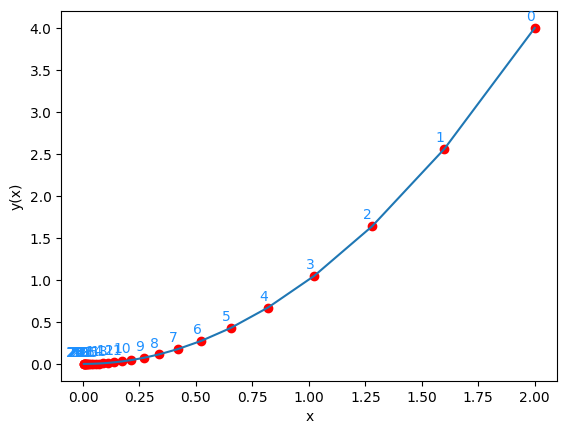

In [12]:
plt.plot(iteration_pd['x'], iteration_pd['y(x)'])
plt.scatter(iteration_pd['x'], iteration_pd['y(x)'], color='red', label='iteration')
 
for index, row in iteration_pd.iterrows():
    plt.text(row['x'] + 0.0, row['y(x)'] + 0.05, str(index),
             fontsize=10, color='DodgerBlue', ha='right', va='bottom')

    plt.xlabel(xlabel='x')
    plt.ylabel(ylabel='y(x)')